In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from information import *
from processing import *
from variance import *
import gfdl_utils as gu

In [3]:

for startmonth in ppeDict['startmonths'][0:1]:
    print(startmonth)

1


In [3]:
variable = 'intpp'
frequency = 'monthly'

In [4]:
control = open_control(variable,frequency)

In [5]:
select = {'yh':0,'xh':-150}

In [11]:
startyear = 123

In [16]:
ensembles = {}
ensembles[1] = open_ensemble(variable,frequency,control=control,startyear=startyear,startmonth=1)
ensembles[4] = open_ensemble(variable,frequency,control=control,startyear=startyear,startmonth=4)
ensembles[7] = open_ensemble(variable,frequency,control=control,startyear=startyear,startmonth=7)
ensembles[10] = open_ensemble(variable,frequency,control=control,startyear=startyear,startmonth=10)

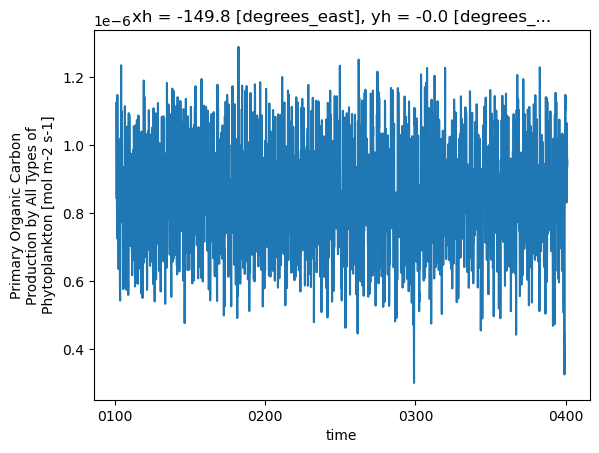

In [17]:
control[variable].sel(**select,method='nearest').plot()

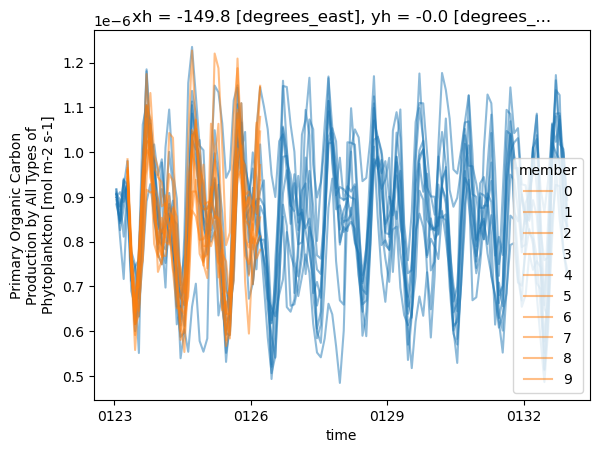

In [21]:
ensembles[1][variable].sel(**select,method='nearest').plot(hue='member',color='tab:blue',alpha=0.5)
ensembles[4][variable].sel(**select,method='nearest').plot(hue='member',color='tab:orange',alpha=0.5)

In [30]:
cvar = calc_cvar(variable,frequency)
evarmeans = {}
for startmonth in ppeDict['startmonths']:
    evarmeans[startmonth] = calc_evarmean(variable,frequency,startmonth=startmonth)
ppps = {}
for startmonth in ppeDict['startmonths']:
    ppps[startmonth] = calc_ppp(variable,frequency,startmonth=startmonth)

/work/gam/projects/esm4_ppe/data/processed/controlvariance/ocean_cobalt_omip_2d.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ensemblevariance/ocean_cobalt_omip_2d.mean01.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ensemblevariance/ocean_cobalt_omip_2d.mean04.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ensemblevariance/ocean_cobalt_omip_2d.mean07.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ensemblevariance/ocean_cobalt_omip_2d.mean10.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ppp/ocean_cobalt_omip_2d.01.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ppp/ocean_cobalt_omip_2d.04.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ppp/ocean_cobalt_omip_2d.07.zarr/intpp already saved.
/work/gam/projects/esm4_ppe/data/processed/ppp/ocean_cobalt_omip_2d.10.zarr/intpp already saved.


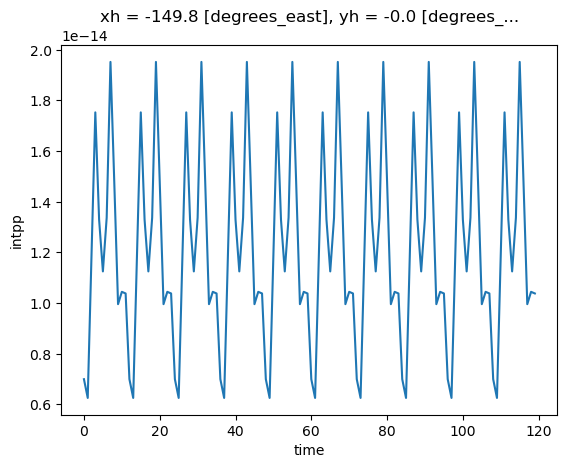

In [31]:
cvar[variable].sel(**select,method='nearest').plot()

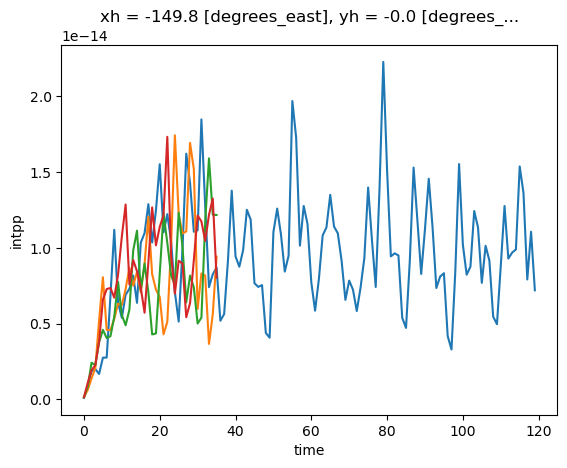

In [32]:
evarmeans[1][variable].sel(**select,method='nearest').plot()
evarmeans[4][variable].sel(**select,method='nearest').plot()
evarmeans[7][variable].sel(**select,method='nearest').plot()
evarmeans[10][variable].sel(**select,method='nearest').plot()

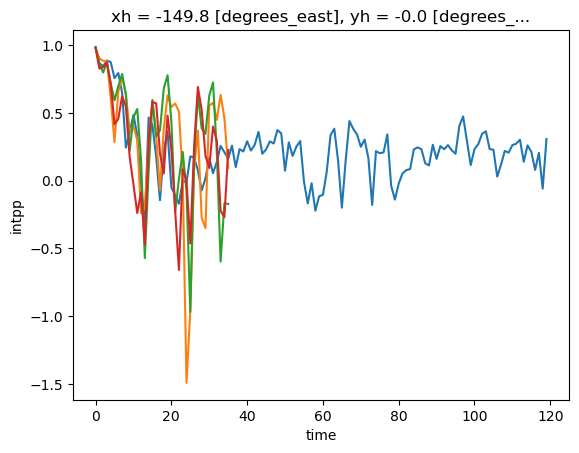

In [33]:
ppps[1][variable].sel(**select,method='nearest').plot()
ppps[4][variable].sel(**select,method='nearest').plot()
ppps[7][variable].sel(**select,method='nearest').plot()
ppps[10][variable].sel(**select,method='nearest').plot()

In [39]:
evarmeans[4]['time']

<xarray.DataArray 'time' (time: 36)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35

In [48]:
startmonth=4
cvar.shift(time=-1*(startmonth-1),)

<xarray.Dataset>
Dimensions:       (time: 120, yh: 576, xh: 720, nv: 2)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * time          (time) int64 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    intpp         (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    intppdiat     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    intppdiaz     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    intppmisc     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    intppnitrate  (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    intpppico     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>

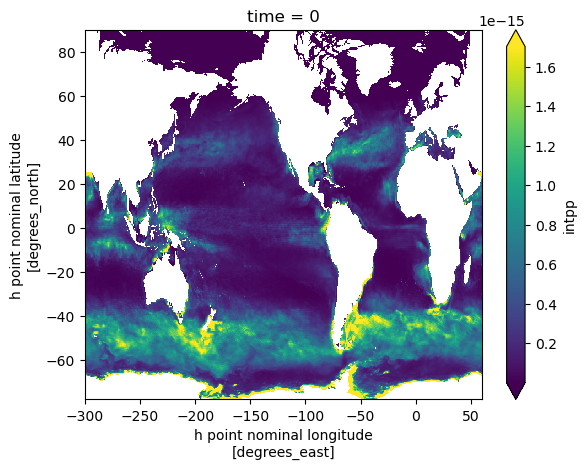

In [37]:
evarmeans[1][variable].isel(time=0).plot(robust=True)

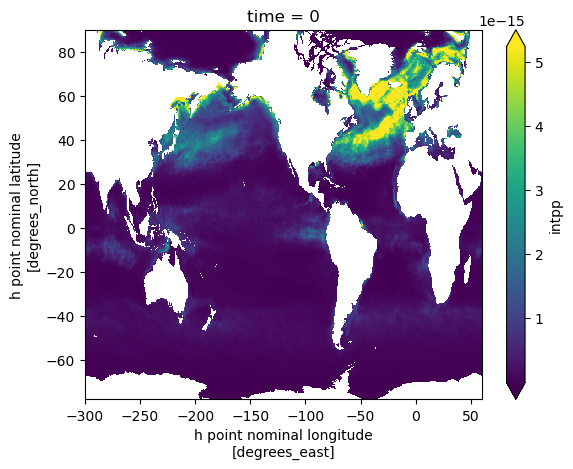

In [38]:
evarmeans[4][variable].isel(time=0).plot(robust=True)

In [15]:
pathDict = get_pathDict_member('tos',
                               'monthly',
                               startyear=123,
                               startmonth=1,
                               member=1,
                               constraint='ocean')

In [17]:
pathDict

{'pp': '/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D-ensemble-01230101-01/gfdl.ncrc4-intel18-prod-openmp/pp',
 'add': 'tos',
 'out': 'ts',
 'time': '*',
 'ppname': 'ocean_month',
 'local': 'monthly/5yr'}

In [13]:
for ppname in gu.core.find_variable(pathDict['pp'],'tos'):
    print(ppname)
    frequency = 'monthly'
    timefrequency = gu.core.get_timefrequency(pathDict['pp'],ppname)
    ppname = 'ocean_month'
    constraint = 'ocean'
    if (bool(re.search(constraint,ppname))) & (timefrequency == frequency):
        print('yep')

ocean_annual
ocean_month
yep
ocean_daily
atmos_month_cmip
yep


In [9]:
bool(re.search(constraint,'atmos_month_cmip'))

False

In [5]:
gu.core.get_timefrequency(pathDict['pp'],ppname)

'monthly'

In [8]:
gu.core.find_variable(pathDict['pp'],'tos')

['ocean_annual', 'ocean_month', 'ocean_daily', 'atmos_month_cmip']

In [9]:
get_allvars_ensemble('monthly')

['hfls',
 'hfss',
 'pr',
 'prc',
 'prsn',
 'rls',
 'rlut',
 'rsdt',
 'rss',
 'rsut',
 'tas',
 'tasl',
 'ts',
 'CH4_lbc',
 'N2O_lbc',
 'cfc113global',
 'cfc11global',
 'cfc12global',
 'ch4global',
 'co2_tf',
 'co2mass',
 'hcfc22global',
 'n2oglobal',
 'rrvch4',
 'rrvco2',
 'rrvf11',
 'rrvf113',
 'rrvf12',
 'rrvf22',
 'rrvn2o',
 'solar_constant',
 'ALB',
 'BSNK',
 'CALVING',
 'CALVING_HFLX',
 'CN',
 'EVAP',
 'EXT',
 'FRAZIL',
 'LH',
 'LSNK',
 'LSRC',
 'LW',
 'MIB',
 'RAIN',
 'RUNOFF',
 'SALTF',
 'SH',
 'SN2IC',
 'SNOWFL',
 'SSH',
 'SSS',
 'SST',
 'SW',
 'SWDN',
 'UO',
 'VO',
 'XPRT',
 'siconc',
 'simass',
 'sisnconc',
 'sisnmass',
 'sisnthick',
 'sispeed',
 'sithick',
 'siu',
 'siv',
 'sivol',
 'mass',
 'melt',
 'stored_ice',
 'virtual_area',
 'btm_co3_ion',
 'btm_co3_sol_arag',
 'btm_co3_sol_calc',
 'btm_htotal',
 'btm_o2',
 'btm_temp',
 'fndet_burial',
 'fno3denit_sed',
 'fnoxic_sed',
 'fcadet_arag_100',
 'fcadet_calc_100',
 'ffedet_100',
 'flithdet_100',
 'fndet_100',
 'fpdet_100',
 '

In [23]:
list(vardict.keys())

['ocean_annual',
 'ocean_annual_rho2',
 'ocean_annual_z',
 'ocean_scalar_annual',
 'atmos_global_cmip',
 'atmos_scalar',
 'ice_month',
 'iceberg_month',
 'ocean_cobalt_btm',
 'ocean_cobalt_fdet_100',
 'ocean_cobalt_fluxes_int',
 'ocean_cobalt_omip_2d',
 'ocean_cobalt_omip_sfc',
 'ocean_cobalt_omip_tracers_month_z',
 'ocean_cobalt_sfc',
 'ocean_cobalt_tracers_int',
 'ocean_month',
 'ocean_month_rho2',
 'ocean_month_snap',
 'ocean_month_z',
 'ocean_scalar_month',
 'ice_daily',
 'ocean_Agulhas_section',
 'ocean_Barents_opening',
 'ocean_Bering_Strait',
 'ocean_Davis_Strait',
 'ocean_Denmark_Strait',
 'ocean_Drake_Passage',
 'ocean_English_Channel',
 'ocean_Faroe_Scotland',
 'ocean_Florida_Bahamas',
 'ocean_Fram_Strait',
 'ocean_Gibraltar_Strait',
 'ocean_Iceland_Faroe_U',
 'ocean_Iceland_Faroe_V',
 'ocean_Iceland_Norway',
 'ocean_Indonesian_Throughflow',
 'ocean_Mozambique_Channel',
 'ocean_Pacific_undercurrent',
 'ocean_Taiwan_Luzon',
 'ocean_Windward_Passage',
 'ocean_cobalt_omip_daily'

In [17]:
gu.core.get_local(ppcontrol,'aerosol_month_cmip','ts')

'monthly/5yr'

In [15]:
get_allvars_ensemble('monthly')

FileNotFoundError: [Errno 2] No such file or directory: '/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_month_cmip.nc/ts'